In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [4]:
# !kaggle datasets download -d ramjasmaurya/medias-cost-prediction-in-foodmart

In [5]:
# !unzip \*.zip  && rm *.zip

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [100]:
data = pd.read_csv("/content/gdrive/MyDrive/Kaggle/media prediction and its cost.csv")

# **1- Introduction**

### This data contains 60k customers' information(personal, shopping) and  the convenience store info of the company Food Mart (CFM). Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately 325 stores located in the US. Convenient Food Mart operates on the franchise system.





## **1.1 PROJECT GOALS & DATA UNDERSTANDING**

## **PROJECT GOALS**
### Aim of this project is to predict how much a customer would pay for her/his shopping, using regression models. 


### **Output:**

### **Cost:** Shopping amount of the customer paid. 

### **Features:**

*   food_category	
*   food_department	
*   food_family
*   store_sales(in millions)
* store_cost(in millions)	
* unit_sales(in millions)	
* promotion_name	sales_country	
* marital_status	
* gender	
* total_children	
* education	
* member_card	
* occupation	
* houseowner	
* avg_cars_at home(approx)	
* avg. yearly_income	
* num_children_at_home	
* avg_cars_at home(approx).1	
* brand_name	
* SRP	
* gross_weight	
* net_weight	
* recyclable_package	
* low_fat	units_per_case	
* store_type	
* store_city	
* store_state	
* store_sqft	
* grocery_sqft	
* frozen_sqft	
* meat_sqft	
* coffee_bar	
* video_store	
* salad_bar	
* prepared_food	
* florist	media_type	










In [68]:
data.shape # data size

(60428, 40)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [70]:
data.head() # first 5 observations

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.360,2.723,4.000,Bag Stuffers,USA,M,F,1.000,Partial High School,Normal,Skilled Manual,Y,1.000,$10K - $30K,1.000,1.000,Carrington,1.840,19.700,17.700,1.000,0.000,17.000,Deluxe Supermarket,Salem,OR,27694.000,18670.000,5415.000,3610.000,1.000,1.000,1.000,1.000,1.000,"Daily Paper, Radio",126.620
1,Breakfast Foods,Frozen Foods,Food,5.520,2.594,3.000,Cash Register Lottery,USA,M,M,0.000,Bachelors Degree,Silver,Professional,Y,4.000,$50K - $70K,0.000,4.000,Carrington,1.840,19.700,17.700,1.000,0.000,17.000,Deluxe Supermarket,Salem,OR,27694.000,18670.000,5415.000,3610.000,1.000,1.000,1.000,1.000,1.000,"Daily Paper, Radio",59.860
2,Breakfast Foods,Frozen Foods,Food,3.680,1.362,2.000,High Roller Savings,USA,S,F,4.000,Partial High School,Normal,Manual,N,1.000,$10K - $30K,0.000,1.000,Carrington,1.840,19.700,17.700,1.000,0.000,17.000,Deluxe Supermarket,Salem,OR,27694.000,18670.000,5415.000,3610.000,1.000,1.000,1.000,1.000,1.000,"Daily Paper, Radio",84.160
3,Breakfast Foods,Frozen Foods,Food,3.680,1.178,2.000,Cash Register Lottery,USA,M,F,2.000,High School Degree,Bronze,Manual,Y,2.000,$30K - $50K,2.000,2.000,Carrington,1.840,19.700,17.700,1.000,0.000,17.000,Deluxe Supermarket,Salem,OR,27694.000,18670.000,5415.000,3610.000,1.000,1.000,1.000,1.000,1.000,In-Store Coupon,95.780
4,Breakfast Foods,Frozen Foods,Food,4.080,1.428,3.000,Double Down Sale,USA,M,M,0.000,Partial High School,Bronze,Skilled Manual,N,2.000,$30K - $50K,0.000,2.000,Golden,1.360,7.120,5.110,0.000,1.000,29.000,Deluxe Supermarket,Salem,OR,27694.000,18670.000,5415.000,3610.000,1.000,1.000,1.000,1.000,1.000,Radio,50.790


In [71]:
data.isnull().sum()  #Data doesn't contain NaN values

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
                           ..
salad_bar                   0
prepared_food               0
florist                     0
media_type                  0
cost                        0
Length: 40, dtype: int64

In [72]:
data.isnull().sum().sum() #Data doesn't contain NaN values therefore no missing value imputation needed. 

0

## Variable's Data Type Analysis - Categorical (Nominal, Ordinal, Cardinal) &  Numerical 

In [73]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    This function makes analysis of categoric, numeric and cardinal variables according to given
    parameters. 

    Parameters
    ------
        dataframe: dataframe
        cat_th: int, optional
                threshold of numeric but categoric variables. 
        car_th: int, optional
                threshold of categoric but cardinal variables.

    Returns
    ------
        cat_cols: list
                categoric columns list
        num_cols: list
                numeric columns list
        cat_but_car: list
                cardinal column list

    Notes
    ------
        cat_cols + num_cols + cat_but_car = all columns
        cat_cols contains num_but_cat (numeric but categoric variables)
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [74]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 60428
Variables: 40
cat_cols: 25
num_cols: 11
cat_but_car: 4
num_but_cat: 12


In [75]:
print(cat_cols)

['food_family', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'store_type', 'store_city', 'store_state', 'media_type', 'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'avg_cars_at home(approx).1', 'recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']


In [76]:
print(num_cols)

['store_sales(in millions)', 'store_cost(in millions)', 'SRP', 'gross_weight', 'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'cost']


In [77]:
print(cat_but_car)

['food_category', 'food_department', 'promotion_name', 'brand_name']


### Cardinal data analysis

In [78]:
for i in cat_but_car:
  print("column: " + i)
  print(data[i].nunique())
  print(data[i].value_counts())

column: food_category
45
Vegetables             7440
Snack Foods            6919
Dairy                  3835
Meat                   3107
Fruit                  3080
                       ... 
Miscellaneous           194
Canned Oysters          189
Canned Shrimp           182
Packaged Vegetables     179
Canned Sardines         171
Name: food_category, Length: 45, dtype: int64
column: food_department
22
Produce                8521
Snack Foods            6919
Household              6185
Frozen Foods           6126
Baking Goods           4497
Canned Foods           4238
Dairy                  3835
Health and Hygiene     3807
Beverages              3014
Deli                   2787
Baked Goods            1797
Alcoholic Beverages    1590
Snacks                 1538
Starchy Foods          1103
Periodicals             971
Eggs                    952
Breakfast Foods         778
Canned Products         400
Checkout                385
Meat                    385
Seafood                 375
Carous

## Numeric Data Analysis
### **Box plots**

In [79]:
num_cols

['store_sales(in millions)',
 'store_cost(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'cost']

In [80]:
def num_box(dataframe, numerical_col, plot=False):
        sns.boxplot(x=dataframe[numerical_col])
        plt.show()

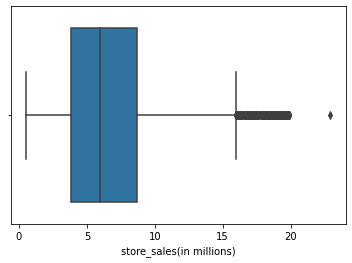

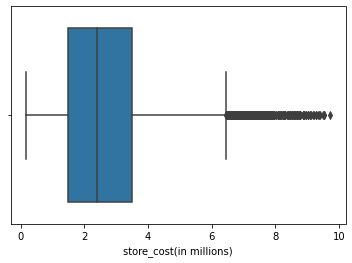

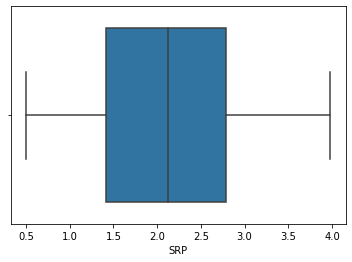

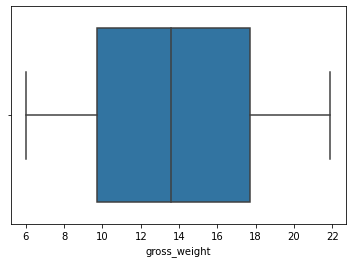

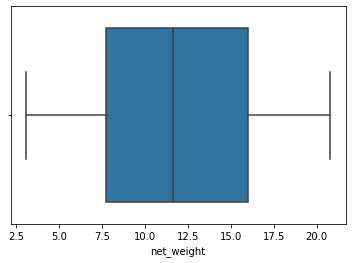

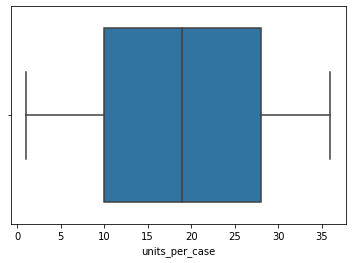

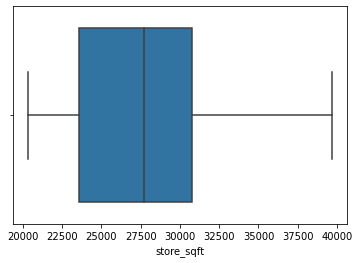

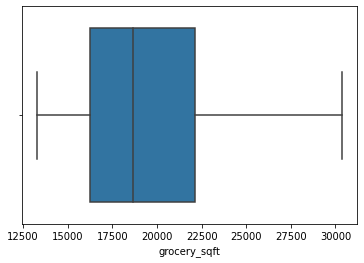

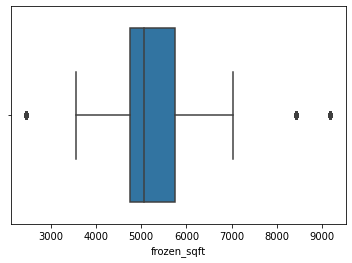

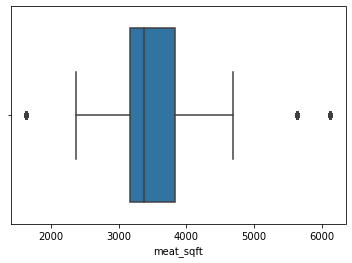

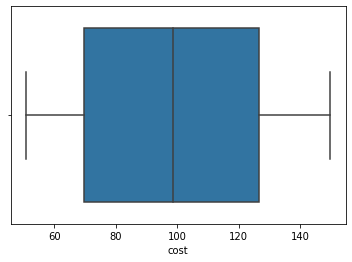

In [81]:
for i in num_cols:
    num_box(data,i,plot=True)

### **Histogram**

In [82]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
        

count   60428.000
mean        6.541
std         3.463
min         0.510
5%          1.800
10%         2.370
20%         3.360
30%         4.380
40%         5.190
50%         5.940
60%         7.040
70%         7.980
80%         9.520
90%        11.340
95%        13.080
99%        15.720
max        22.920
Name: store_sales(in millions), dtype: float64


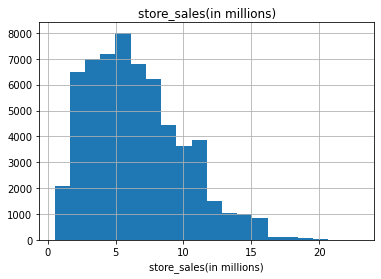

count   60428.000
mean        2.619
std         1.453
min         0.163
5%          0.709
10%         0.913
20%         1.306
30%         1.677
40%         2.041
50%         2.386
60%         2.768
70%         3.229
80%         3.767
90%         4.648
95%         5.345
99%         6.829
max         9.726
Name: store_cost(in millions), dtype: float64


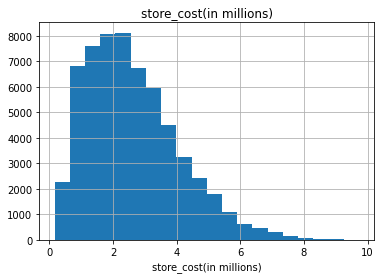

count   60428.000
mean        2.115
std         0.933
min         0.500
5%          0.640
10%         0.800
20%         1.280
30%         1.540
40%         1.770
50%         2.130
60%         2.380
70%         2.660
80%         2.920
90%         3.460
95%         3.750
99%         3.950
max         3.980
Name: SRP, dtype: float64


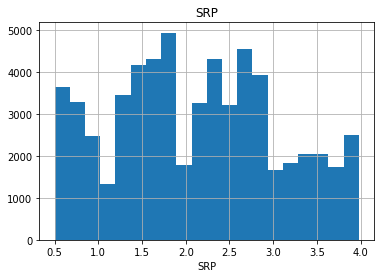

count   60428.000
mean       13.806
std         4.623
min         6.000
5%          6.960
10%         7.650
20%         9.020
30%        10.400
40%        11.900
50%        13.600
60%        15.300
70%        17.100
80%        18.700
90%        20.300
95%        21.200
99%        21.800
max        21.900
Name: gross_weight, dtype: float64


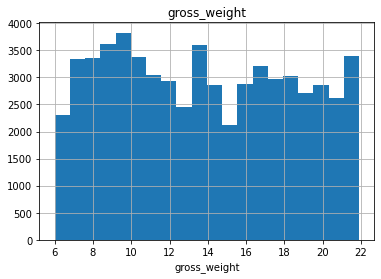

count   60428.000
mean       11.796
std         4.683
min         3.050
5%          4.940
10%         5.650
20%         7.100
30%         8.380
40%         9.890
50%        11.600
60%        13.500
70%        15.100
80%        16.700
90%        18.300
95%        19.200
99%        20.200
max        20.800
Name: net_weight, dtype: float64


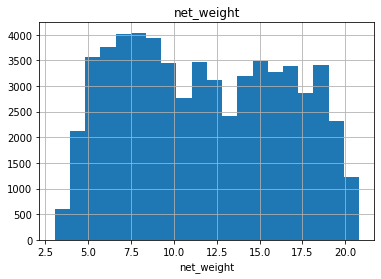

count   60428.000
mean       18.861
std        10.259
min         1.000
5%          3.000
10%         5.000
20%         8.000
30%        12.000
40%        15.000
50%        19.000
60%        23.000
70%        26.000
80%        29.000
90%        33.000
95%        34.000
99%        36.000
max        36.000
Name: units_per_case, dtype: float64


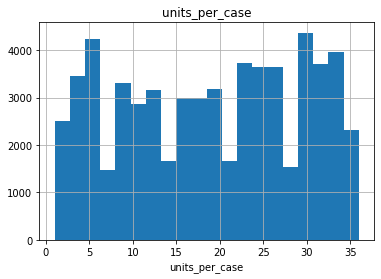

count   60428.000
mean    27988.477
std      5701.022
min     20319.000
5%      20319.000
10%     21215.000
20%     23112.000
30%     23598.000
40%     23759.000
50%     27694.000
60%     30268.000
70%     30797.000
80%     33858.000
90%     34791.000
95%     39696.000
99%     39696.000
max     39696.000
Name: store_sqft, dtype: float64


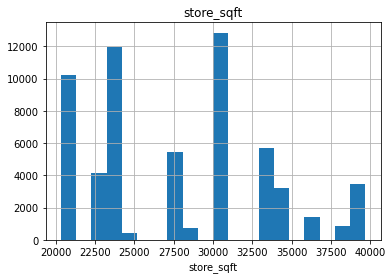

count   60428.000
mean    19133.800
std      3987.396
min     13305.000
5%      13305.000
10%     14210.000
20%     15337.000
30%     16232.000
40%     16844.000
50%     18670.000
60%     20141.000
70%     22063.000
80%     22123.000
90%     24390.000
95%     26354.000
99%     30351.000
max     30351.000
Name: grocery_sqft, dtype: float64


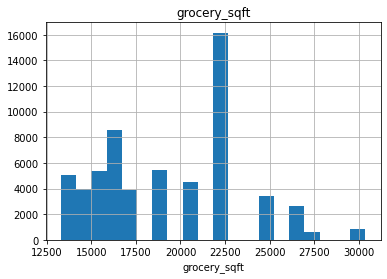

count   60428.000
mean     5312.853
std      1575.907
min      2452.000
5%       2452.000
10%      3671.000
20%      4149.000
30%      4746.000
40%      4923.000
50%      5062.000
60%      5415.000
70%      5633.000
80%      6393.000
90%      7041.000
95%      9184.000
99%      9184.000
max      9184.000
Name: frozen_sqft, dtype: float64


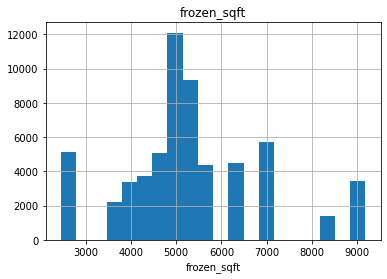

count   60428.000
mean     3541.846
std      1050.472
min      1635.000
5%       1635.000
10%      2447.000
20%      2766.000
30%      3164.000
40%      3282.000
50%      3375.000
60%      3610.000
70%      3755.000
80%      4262.000
90%      4694.000
95%      6122.000
99%      6122.000
max      6122.000
Name: meat_sqft, dtype: float64


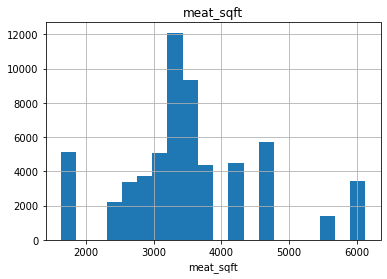

count   60428.000
mean       99.262
std        30.011
min        50.790
5%         53.820
10%        58.270
20%        67.310
30%        77.720
40%        90.580
50%        98.520
60%       108.220
70%       121.440
80%       131.810
90%       140.570
95%       145.410
99%       148.870
max       149.750
Name: cost, dtype: float64


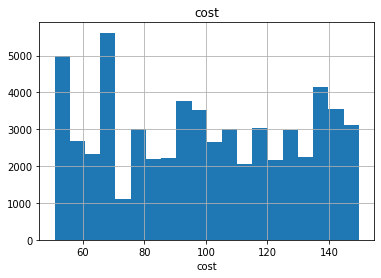

In [83]:
for i in num_cols:
    num_summary(data,i,plot=True)

In [84]:
def num_summary_skew(dataframe, numerical_col, plot=False):
        sns.distplot(dataframe[numerical_col])
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


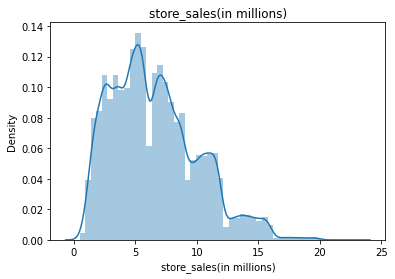

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


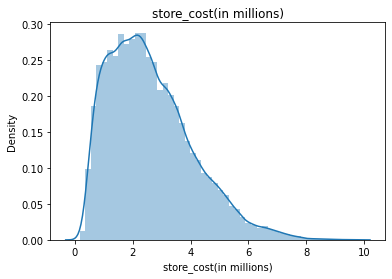

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


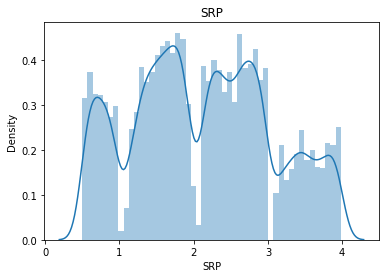

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


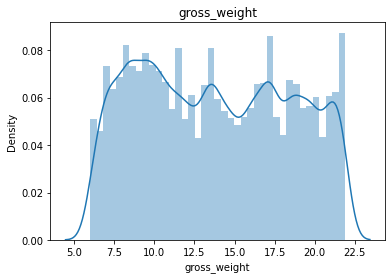

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


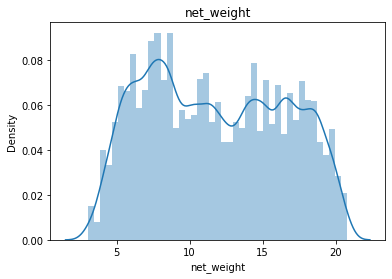

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


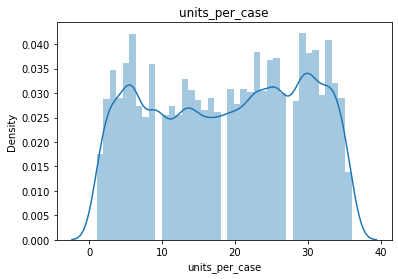

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


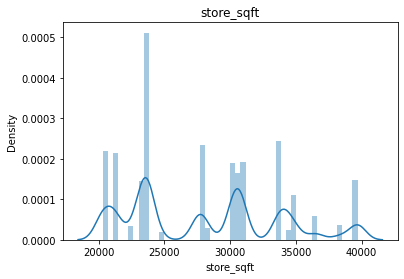

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


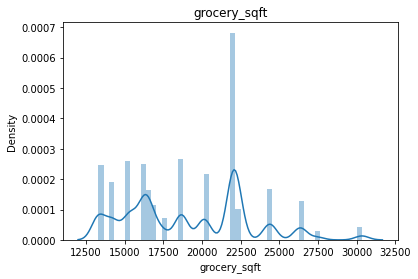

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


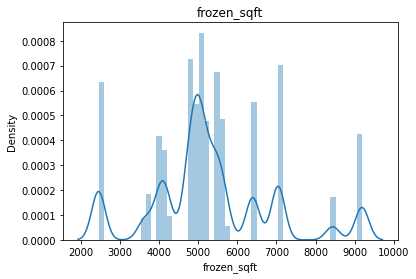

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


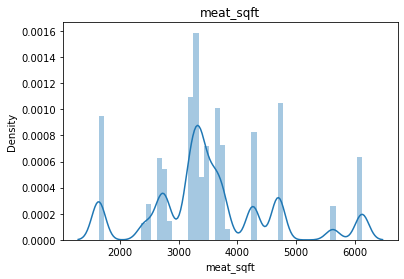

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


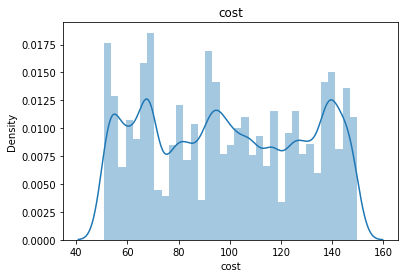

In [85]:
for i in num_cols:
    num_summary_skew(data,i,plot=True)

## Correlation analysis

In [86]:
mask = np.triu(np.ones_like(data.corr()))

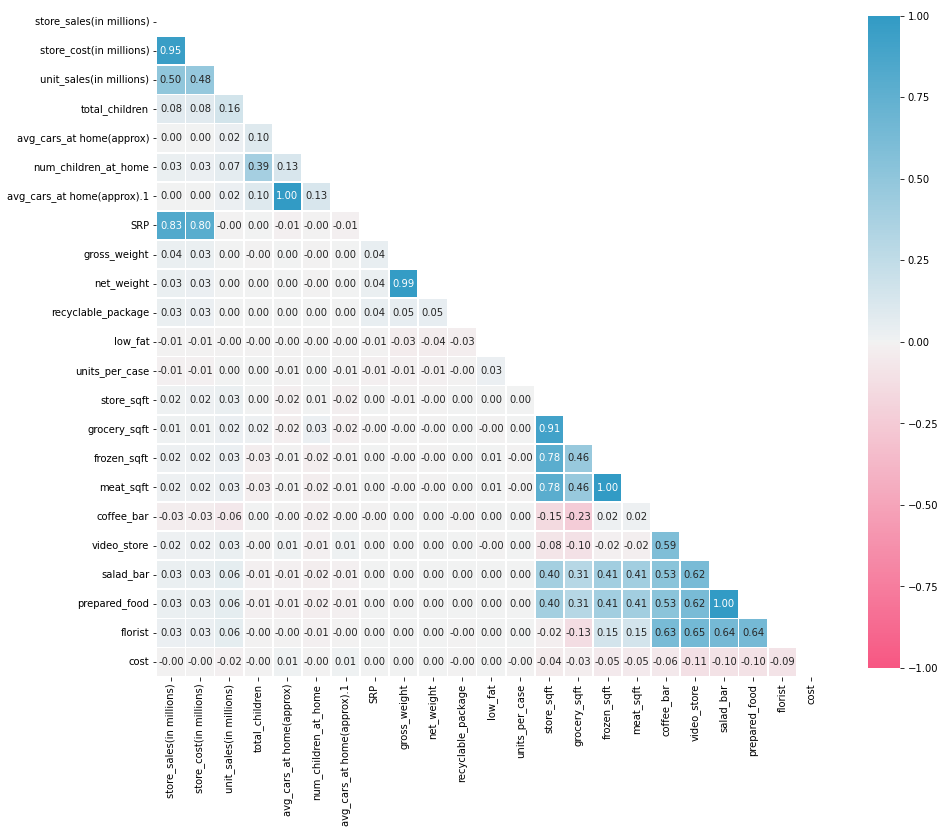

In [87]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap, vmin=-1, vmax=1,  cbar_kws={"shrink": .8}, square=True, annot=True, fmt='.2f',linewidths=.8,mask=mask)

plt.show()

## Outlier Anaylsis
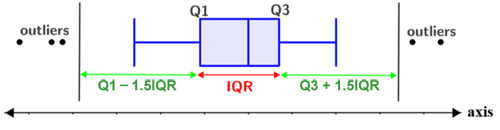


In [88]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [89]:
for i in num_cols:
    print(outlier_thresholds(data,i))

(-19.08, 36.6)
(-8.469612999999999, 16.007675)
(-4.325, 8.915)
(-15.299999999999997, 44.06)
(-17.949999999999996, 43.089999999999996)
(-46.5, 85.5)
(-8746.5, 68761.5)
(-12264.0, 55920.0)
(-7646.0, 19282.0)
(-5095.5, 12852.5)
(-88.75500000000002, 291.44500000000005)


In [90]:
for i in num_cols:
    print(check_outlier(data,i))

False
False
False
False
False
False
False
False
False
False
False


## Normalization and Standardization

### Standard Scaling

In [55]:
num_cols

['store_sales(in millions)',
 'store_cost(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'cost']

In [101]:
df_sscale = data.copy()

In [102]:
df_sscale[['store_sales(in millions)','store_cost(in millions)']].head()

,store_sales(in millions),store_cost(in millions)
0,7.360,2.723
1,5.520,2.594
2,3.680,1.362
3,3.680,1.178
4,4.080,1.428


In [103]:
ss = StandardScaler()
df_sscale[['store_sales(in millions)','store_cost(in millions)']] = ss.fit_transform(df_sscale[['store_sales(in millions)','store_cost(in millions)']])


In [104]:
df_sscale[['store_sales(in millions)','store_cost(in millions)']].head()

,store_sales(in millions),store_cost(in millions)
0,0.236,0.071
1,-0.295,-0.017
2,-0.826,-0.866
3,-0.826,-0.992
4,-0.711,-0.820


### Min-Max Scaler (Normalization)

### X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
### X_scaled = X_std * (max - min) + min

In [105]:
df_mm = data.copy()

In [108]:
data[num_cols].head()

,store_sales(in millions),store_cost(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,7.360,2.723,1.840,19.700,17.700,17.000,27694.000,18670.000,5415.000,3610.000,126.620
1,5.520,2.594,1.840,19.700,17.700,17.000,27694.000,18670.000,5415.000,3610.000,59.860
2,3.680,1.362,1.840,19.700,17.700,17.000,27694.000,18670.000,5415.000,3610.000,84.160
3,3.680,1.178,1.840,19.700,17.700,17.000,27694.000,18670.000,5415.000,3610.000,95.780
4,4.080,1.428,1.360,7.120,5.110,29.000,27694.000,18670.000,5415.000,3610.000,50.790


In [106]:
mms = MinMaxScaler()
df_mm[num_cols] = mms.fit_transform(df_mm[num_cols])

In [107]:
df_mm[num_cols].head()

,store_sales(in millions),store_cost(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,0.306,0.268,0.385,0.862,0.825,0.457,0.381,0.315,0.440,0.440,0.766
1,0.224,0.254,0.385,0.862,0.825,0.457,0.381,0.315,0.440,0.440,0.092
2,0.141,0.125,0.385,0.862,0.825,0.457,0.381,0.315,0.440,0.440,0.337
3,0.141,0.106,0.385,0.862,0.825,0.457,0.381,0.315,0.440,0.440,0.455
4,0.159,0.132,0.247,0.070,0.116,0.800,0.381,0.315,0.440,0.440,0.000
